# Iris Data Set

The iris dataset is one of the traditional dummy datasets used for training. Contained data has been collected in the early $20$-th century regarding characteristics of three different types of iris flowers.

In [1]:
import sklearn as sk

The `scikit-learn` library contains a module enabling easy loading of a number of standard datasets. This sub-module is simply the `datasets`. 

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

Within the following notebook we'll be going through the different steps one goes through when trying to figure out when studying a dataset.

## 1. Going through main features of data set.

How is the `iris` object stored? What are its attributes? What do they correspond to?

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [6]:
iris.target, iris.target_names

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.data.shape

(150, 4)

In [9]:
iris.data.dtype

dtype('float64')

## 2. Why not represent data set in a human readable fashion?

Represent dataset as a `pandas` data frame with feature names (columns).

In [10]:
import pandas as pd
from pandas import DataFrame

In [11]:
DataFrame?

In [12]:
pd_X = DataFrame({iris.feature_names[0]: iris.data[:, 0]})

In [13]:
pd_X.iloc[:10, :]

,sepal length (cm)
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
5,5.4
6,4.6
7,5.0
8,4.4
9,4.9


In [14]:
Df_pd = DataFrame(iris.data, columns=iris.feature_names)
Df_pd.iloc[:10, :]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [15]:
Df_pd.values[:10, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [16]:
Df_pd["Target"] = iris.target
Df_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
Df_pd.iloc[:, 0:4].values.dtype, Df_pd.iloc[:, 4].values.dtype

(dtype('float64'), dtype('int64'))

## 3. What is it exactly that we want to do?

It's crucial to be able to state our goals. Depending on the task we're looking into we're going to possibly build-up rather different work-flows.

The task we're going to look into first is the one of labelling an iris (given by its 4 measurements) into one of the three classes : `setosa`, `versicolor` and `virginica`.

This is a classification task. 

## 4. Isolate a test set.

In order to be able to compare two models' *accuracies* one shall need a common testing base ; that's the test set. The leftover of the `iris` dataset is the training set used to tune parameters of the model we've chosen to accomplish our task.

In [18]:
import numpy as np

If we cut the dataset into training and test sets this way we're going to see more `0` and `1` classes than `2`s during training. We're also only going to test our model on `2` labels. Both these facts are going to give a rather badly behaved model. 

Solution for this is to try shuffling the dataset priori to cut in order to have a statistically random training and test sets (target wise).

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_test_split?

In [21]:
X = Df_pd.values[:, 0:4]
y = Df_pd.values[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [23]:
np.sum(y_train == 2), np.sum(y_test == 2)

(39, 11)

## 5. Why not plot data when plotting makes sense?

Look into the `matplotlib` documentation and releveant notebook within the course's repository for plotting.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
sns.set_style("darkgrid")

Text(0.5,1,'Distribution of Iris Petal Measurements')

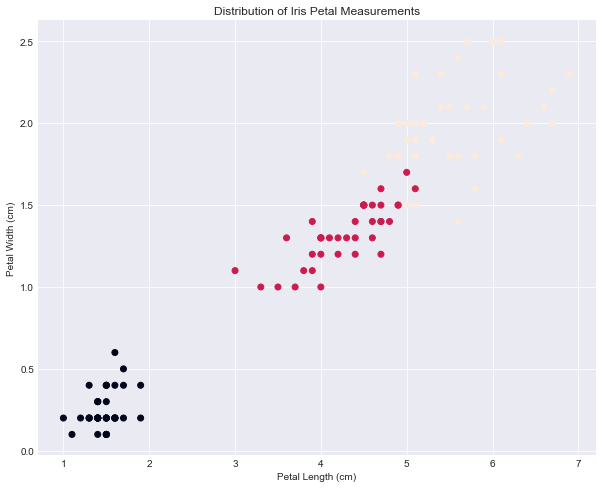

In [26]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_train[:, 2], X_train[:, 3], c=y_train)
ax.set_xlabel("Petal Length (cm)")
ax.set_ylabel("Petal Width (cm)")
ax.set_title("Distribution of Iris Petal Measurements")


We would like to have labels per class. From within matplotlib one would need to go a little deepr to get a good grasp of such a feature with the previous syntax. There is a round about way to go around the previous case. 

Text(0.5,1,'Distribution of Iris Petal Measurements')

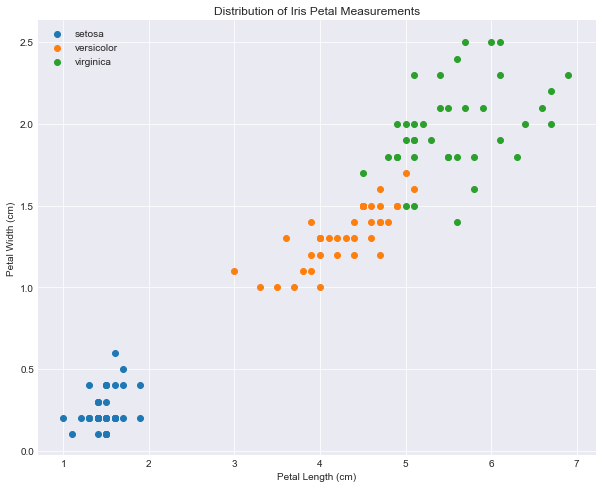

In [27]:
fig, ax = plt.subplots(figsize=(10, 8))
for feature_index  in range(3):
    index = y_train == feature_index
    ax.scatter(X_train[index][:, 2], X_train[index][:, 3], 
               label=iris.target_names[feature_index])
ax.legend(loc='upper left')
ax.set_xlabel("Petal Length (cm)")
ax.set_ylabel("Petal Width (cm)")
ax.set_title("Distribution of Iris Petal Measurements")

## 6. Choose a model (simple first!) and train it.

Once the assigned task is well defined you have a series of available models within the `scikit-learn` stack answering such task. Choose a simple one to start out a training process.  

Let's first choose the `Naive Bayes` model, one of the simplest classification models.

In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
gnb_clf = GaussianNB()

In [30]:
gnb_clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [31]:
gnb_clf.predict(X_test)

array([0., 2., 1., 2., 0., 2., 2., 0., 1., 2., 2., 1., 0., 2., 1., 2., 1.,
       0., 2., 2., 0., 1., 0., 1., 2., 1., 0., 1., 2., 1.])

## 7. Evaluate model

Evaluating a model is firstly to enable comparison to other model's. It does only poorly make sense to evaluate a single model, unless you're overly satisfied with results. Part of the job is to choose among different models that's what evaluation is there for.

There are a few number of steps to follow when evaluating a model:
- Choose metric.
    What is important ; proportion of right answers, proportions of wrong answers with respect to right ones? etc.
- Check for score on test set.
- Check for stability of scores through cross-validation. 
    Cutting training set into a number of statistically equivalent data sets one can train model on all chunks but one 
    and evaluating mode on leftover chunk. Repeating this strategy for each single chunk one gets as many scores as 
    chunks. This gives an idea of stability of score of model.
- Plot learning curves to get an idea of overfitting or underfitting behaviour.

In the case of the Naive Bayes previous model we could look into **accuracy score** : the proposition of well labeled flowers.

In [32]:
np.sum(gnb_clf.predict(X_test) == y_test) / y_test.shape[0]

0.9666666666666667

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score??

In [35]:
accuracy_score(gnb_clf.predict(X_test), y_test)

0.9666666666666667

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
cross_val_score(gnb_clf, X_train, y_train, cv=3)

array([0.975, 1.   , 0.925])

In [38]:
cross_val_score?

### Plotting Learning Curves

In [47]:
def learning_curve(model, X, y, X_test, y_test, min_index=0):
    max_index = X.shape[0]
    indexes = np.arange(min_index, max_index)
    scores_train, scores_test = [], []
    for i in range(min_index, max_index):
        X_i, y_i = X[:i], y[:i]
        model.fit(X_i, y_i)
        scores_train.append(accuracy_score(model.predict(X_i), y_i))
        scores_test.append(accuracy_score(model.predict(X_test), y_test))
    return indexes, scores_train, scores_test

In [48]:
indexes, scores_train, scores_test = learning_curve(gnb_clf, X_train, y_train, 
                                                   X_test, y_test, min_index=10) 

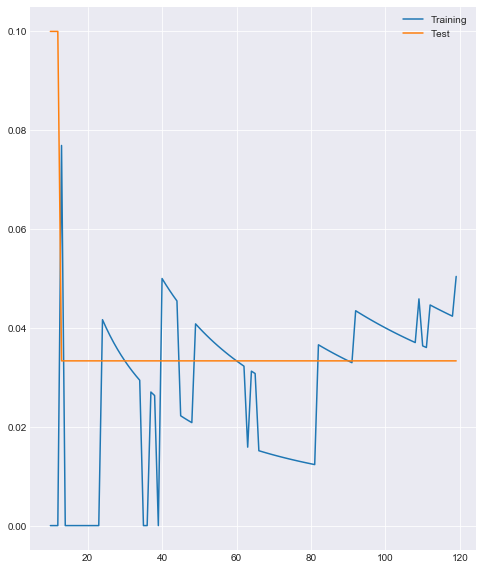

In [49]:
fig, ax = plt.subplots(figsize=(8, 10))
ax.plot(indexes, [1 - score for score in scores_train], label="Training")
ax.plot(indexes, [1 - score for score in scores_test], label="Test")
ax.legend()

## 8. Get back to point 6.

If score is not satisfying yet, assuming you're underfitting your data go on for a more complex model, if you're overfitting data go on for a more constrained or simpler one.

Let's look into **logistic regression**!

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
log_clf = LogisticRegression()

In [44]:
log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
accuracy_score(log_clf.predict(X_test), y_test)

0.9333333333333333

In [46]:
cross_val_score(log_clf, X_train, y_train)

array([0.975, 0.925, 0.975])

## Conclusion

We could decide on trying out another more complex model, but it will only increase accuracy marginally in this case. You can try out an `SVM` classifier (`SVC`class in sklearn). Point being that a linear `SVC` wouldn't give better results but one could try a polynomial or an RBF kernel.